# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [ ]:
# Install the required libraries
!pip install prophet

In [ ]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [ ]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-3-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [ ]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


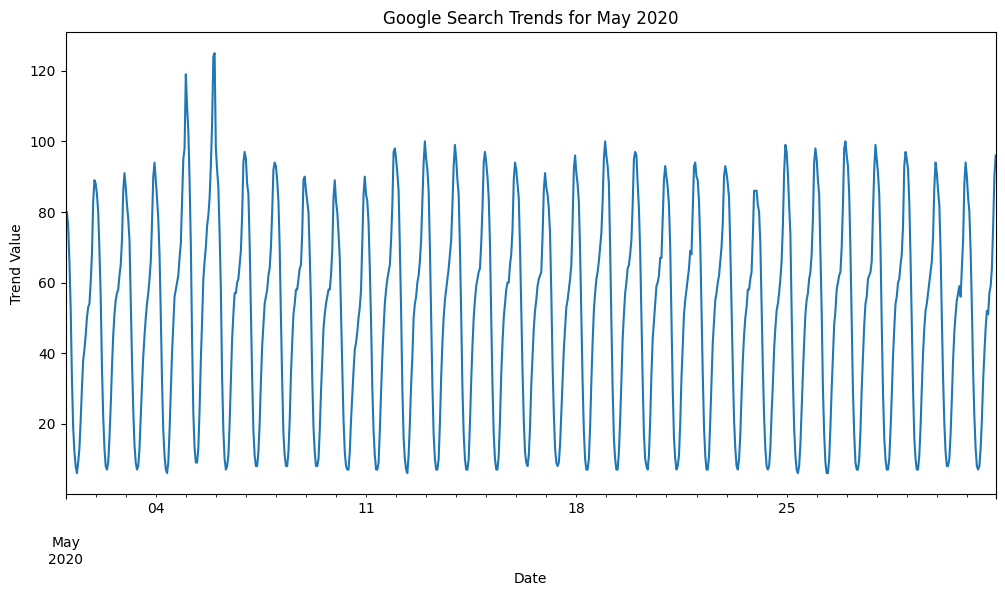

In [ ]:
# Slice the DataFrame to just the month of May 2020
may_2020_data = df_mercado_trends.loc['2020-05-01':'2020-05-31']

# Plot to visualize the data for May 2020
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
may_2020_data['Search Trends'].plot(title="Google Search Trends for May 2020")
plt.xlabel("Date")
plt.ylabel("Trend Value")
plt.show()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [ ]:
# Calculate the sum of the total search traffic for May 2020
may_2020_data = df_mercado_trends.loc['2020-05-01':'2020-05-31']
traffic_may_2020 = may_2020_data['Search Trends'].sum()


# View the traffic_may_2020 value
print(f"Total search traffic for May 2020: {traffic_may_2020}")


Total search traffic for May 2020: 38181


In [ ]:
# Calcluate the monhtly median search traffic across all months
monthly_traffic = df_mercado_trends.resample('M')['Search Trends'].sum()

# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = monthly_traffic.median()


# View the median_monthly_traffic value
print(f"The median monthly search traffic across all months is: {median_monthly_traffic}")


The median monthly search traffic across all months is: 35172.5


<ipython-input-9-a1dd31c59328>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_traffic = df_mercado_trends.resample('M')['Search Trends'].sum()


In [ ]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic

# Total search traffic for May 2020
may_2020_data = df_mercado_trends.loc['2020-05-01':'2020-05-31']
traffic_may_2020 = may_2020_data['Search Trends'].sum()

# Overall monthly median value
monthly_traffic = df_mercado_trends.resample('M')['Search Trends'].sum()
median_monthly_traffic = monthly_traffic.median()


if traffic_may_2020 > median_monthly_traffic:
    comparison = "higher"
elif traffic_may_2020 < median_monthly_traffic:
    comparison = "lower"
else:
    comparison = "equal"

print(f"The search traffic for May 2020 ({traffic_may_2020}) is {comparison} than the overall monthly median ({median_monthly_traffic}).")


The search traffic for May 2020 (38181) is higher than the overall monthly median (35172.5).


<ipython-input-11-5470dd220891>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_traffic = df_mercado_trends.resample('M')['Search Trends'].sum()


##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:**

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search da

```
# This is formatted as code
```

ta, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

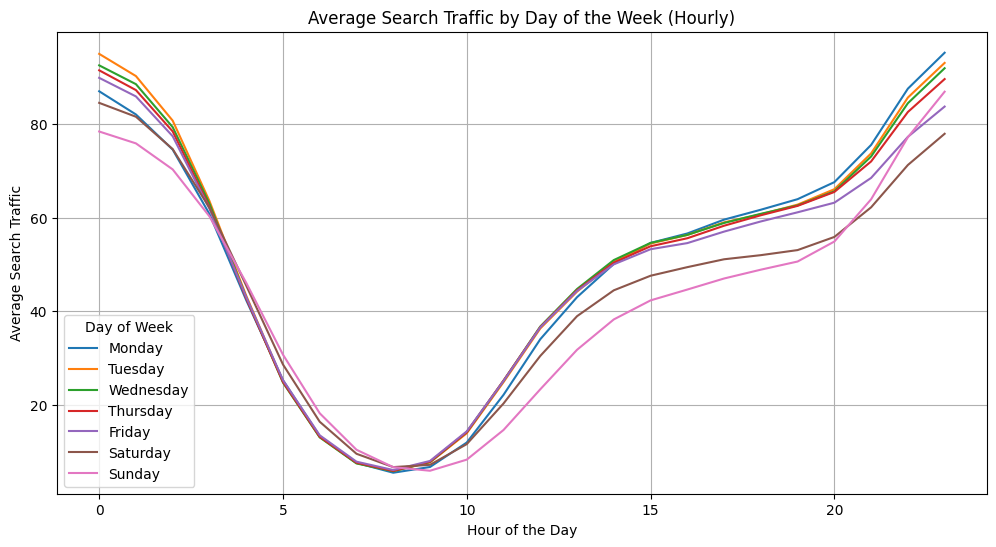

In [ ]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
# Add 'DayOfWeek' and 'Hour' columns
df_mercado_trends['DayOfWeek'] = df_mercado_trends.index.dayofweek
df_mercado_trends['Hour'] = df_mercado_trends.index.hour

# Group by 'DayOfWeek' and 'Hour' and calculate the mean
hourly_avg_by_day = df_mercado_trends.groupby(['DayOfWeek', 'Hour'])['Search Trends'].mean().unstack(level=0)

# Plot the results
plt.figure(figsize=(12, 6))
hourly_avg_by_day.plot(ax=plt.gca())
plt.title("Average Search Traffic by Day of the Week (Hourly)")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Search Traffic")
plt.legend(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], title="Day of Week")
plt.grid()
plt.show()


#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

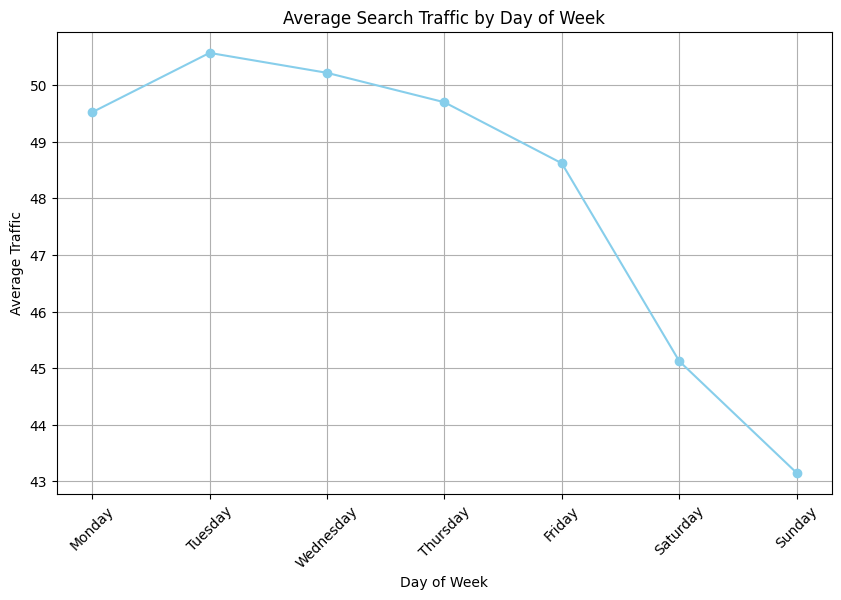

In [ ]:
# Extract the ISO calendar day of the week (1 = Monday, 7 = Sunday)
df_mercado_trends['ISO_DayOfWeek'] = df_mercado_trends.index.isocalendar().day

# Group the data by day of the week and calculate the average traffic
average_traffic_by_isoday = df_mercado_trends.groupby('ISO_DayOfWeek')['Search Trends'].mean()

# Map ISO day numbers to day names for better readability
iso_day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
                   5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
average_traffic_by_isoday.index = average_traffic_by_isoday.index.map(iso_day_mapping)

# Plot the average traffic by day of the week
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
average_traffic_by_isoday.plot(kind='line', marker='o', color='skyblue')
plt.title("Average Search Traffic by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Traffic")
plt.xticks(rotation=45)
plt.grid()
plt.show()


#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

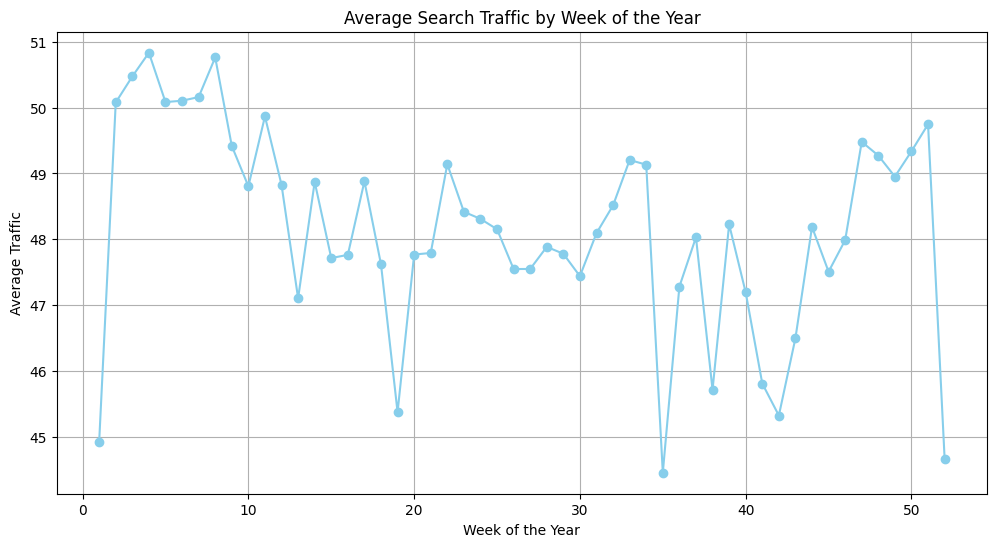

In [ ]:
# Extract the ISO week number (1 to 52/53) from the index
df_mercado_trends['ISO_Week'] = df_mercado_trends.index.isocalendar().week

# Group the data by the week of the year and calculate the average traffic
average_traffic_by_week = df_mercado_trends.groupby('ISO_Week')['Search Trends'].mean()

# Plot the average traffic by week of the year
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
average_traffic_by_week.plot(kind='line', marker='o', color='skyblue')
plt.title("Average Search Traffic by Week of the Year")
plt.xlabel("Week of the Year")
plt.ylabel("Average Traffic")
plt.grid()
plt.show()


##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:**

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [ ]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


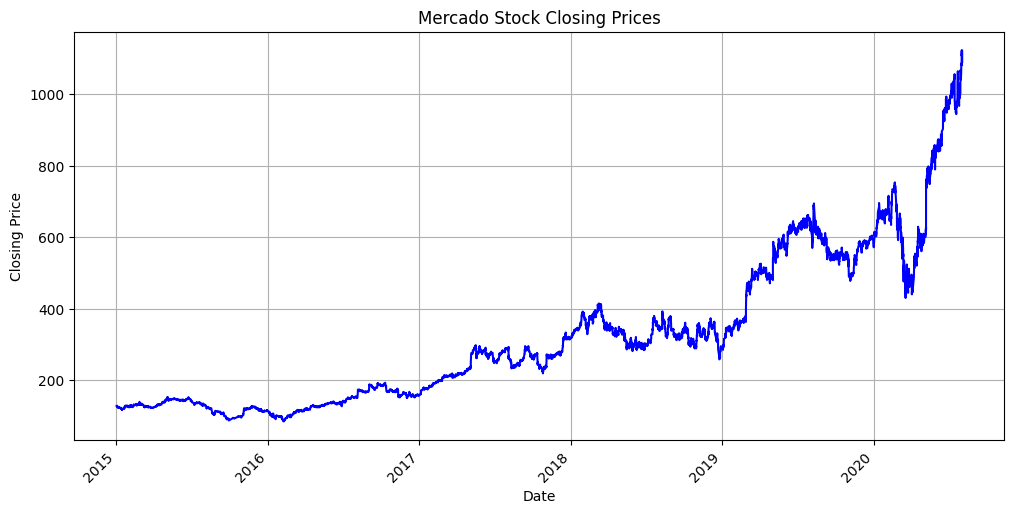

In [ ]:
# Visualize the closing price of the df_mercado_stock DataFrame
plt.figure(figsize=(12, 6))
df_mercado_stock['close'].plot(title="Mercado Stock Closing Prices", color='blue')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines for clarity
plt.show()

In [ ]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data

df_combined = pd.concat([df_mercado_stock, df_mercado_trends], axis=1)

# Drop rows with data in only one column (rows where all but one column is NaN)
df_combined = df_combined.dropna(how='any')

# View the first and last five rows of the combined DataFrame
display(df_combined.head())
display(df_combined.tail())




,close,Search Trends,DayOfWeek,Hour,ISO_DayOfWeek,ISO_Week
2016-06-01 09:00:00,135.16,6.0,2.0,9.0,3,22
2016-06-01 10:00:00,136.63,12.0,2.0,10.0,3,22
2016-06-01 11:00:00,136.56,22.0,2.0,11.0,3,22
2016-06-01 12:00:00,136.42,33.0,2.0,12.0,3,22
2016-06-01 13:00:00,136.10,40.0,2.0,13.0,3,22


,close,Search Trends,DayOfWeek,Hour,ISO_DayOfWeek,ISO_Week
2020-07-31 11:00:00,1105.780,20.0,4.0,11.0,5,31
2020-07-31 12:00:00,1087.925,32.0,4.0,12.0,5,31
2020-07-31 13:00:00,1095.800,41.0,4.0,13.0,5,31
2020-07-31 14:00:00,1110.650,47.0,4.0,14.0,5,31
2020-07-31 15:00:00,1122.510,53.0,4.0,15.0,5,31


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [ ]:
# Slice the DataFrame for the first half of 2020
first_half_2020 = df_combined.loc['2020-01-01':'2020-06-30']

# View the first and last five rows of the sliced DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())


,close,Search Trends,DayOfWeek,Hour,ISO_DayOfWeek,ISO_Week
2020-01-02 09:00:00,601.085,9.0,3.0,9.0,4,1
2020-01-02 10:00:00,601.290,14.0,3.0,10.0,4,1
2020-01-02 11:00:00,615.410,25.0,3.0,11.0,4,1
2020-01-02 12:00:00,611.400,37.0,3.0,12.0,4,1
2020-01-02 13:00:00,611.830,50.0,3.0,13.0,4,1


,close,Search Trends,DayOfWeek,Hour,ISO_DayOfWeek,ISO_Week
2020-06-30 11:00:00,976.17,17.0,1.0,11.0,2,27
2020-06-30 12:00:00,977.50,27.0,1.0,12.0,2,27
2020-06-30 13:00:00,973.23,37.0,1.0,13.0,2,27
2020-06-30 14:00:00,976.50,45.0,1.0,14.0,2,27
2020-06-30 15:00:00,984.93,51.0,1.0,15.0,2,27


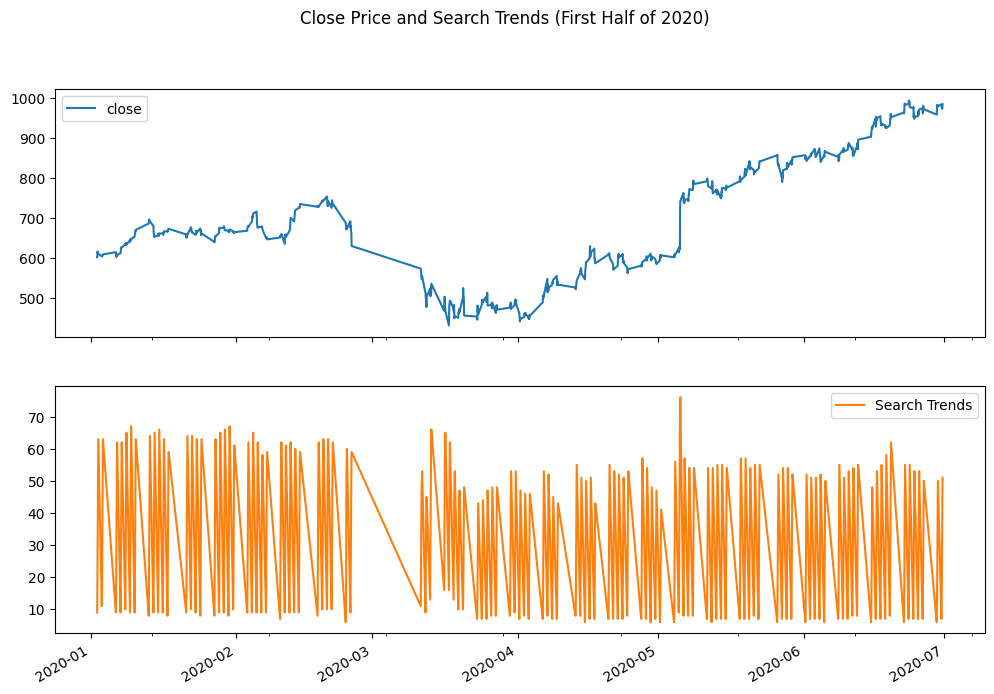

In [ ]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`

first_half_2020[['close', 'Search Trends']].plot(
    subplots=True,  # Create separate subplots for each column
    figsize=(12, 8),  # Set the figure size
    title="Close Price and Search Trends (First Half of 2020)"
)

# Display the plot
plt.show()


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:**

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour

df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)

# View the first few rows to confirm
display(df_combined.head())



,close,Search Trends,DayOfWeek,Hour,ISO_DayOfWeek,ISO_Week,Lagged Search Trends
2016-06-01 09:00:00,135.16,6.0,2.0,9.0,3,22,NaN
2016-06-01 10:00:00,136.63,12.0,2.0,10.0,3,22,6.0
2016-06-01 11:00:00,136.56,22.0,2.0,11.0,3,22,12.0
2016-06-01 12:00:00,136.42,33.0,2.0,12.0,3,22,22.0
2016-06-01 13:00:00,136.10,40.0,2.0,13.0,3,22,33.0


In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window

# Calculate the percentage return of the closing stock price
df_combined['Close Return'] = df_combined['close'].pct_change()

# Calculate the rolling standard deviation (volatility) over a 4-period window
df_combined['Stock Volatility'] = df_combined['Close Return'].rolling(window=4).std()

# View the first few rows to confirm
display(df_combined.head())



,close,Search Trends,DayOfWeek,Hour,ISO_DayOfWeek,ISO_Week,Lagged Search Trends,Close Return,Stock Volatility
2016-06-01 09:00:00,135.16,6.0,2.0,9.0,3,22,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,2.0,10.0,3,22,6.0,0.010876,NaN
2016-06-01 11:00:00,136.56,22.0,2.0,11.0,3,22,12.0,-0.000512,NaN
2016-06-01 12:00:00,136.42,33.0,2.0,12.0,3,22,22.0,-0.001025,NaN
2016-06-01 13:00:00,136.10,40.0,2.0,13.0,3,22,33.0,-0.002346,0.006134


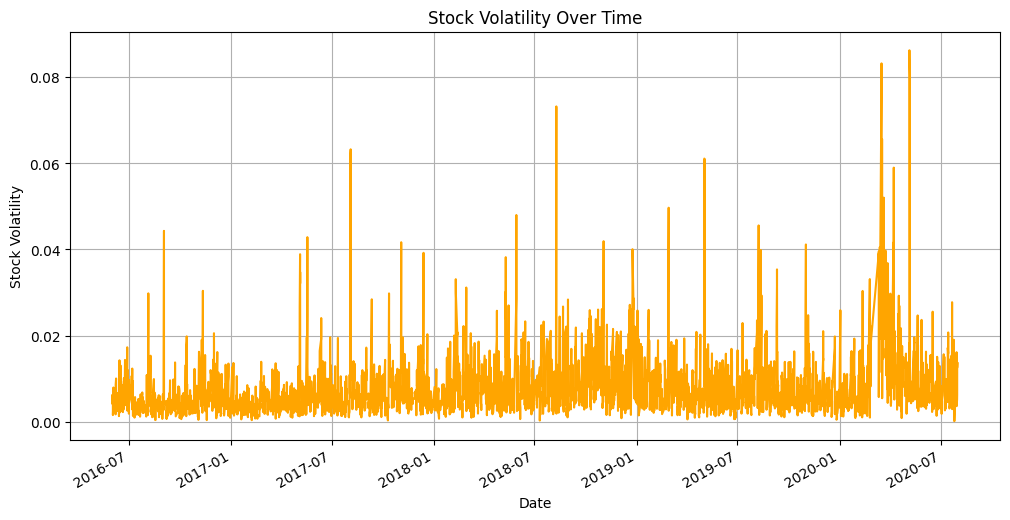

In [ ]:
# Visualize the stock volatility

plt.figure(figsize=(12, 6))
df_combined['Stock Volatility'].plot(title="Stock Volatility Over Time", color='orange')
plt.xlabel("Date")
plt.ylabel("Stock Volatility")
plt.grid(True)
plt.show()



**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [ ]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price

# Calculate the hourly return percentage of the closing price
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change()

# View the first few rows to confirm
display(df_combined.head())

# Rename the DataFrame
mercado_stock_trends_df = df_combined

# Calculate the hourly return percentage of the closing price
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change()

# View the first few rows to confirm
display(mercado_stock_trends_df.head())




,close,Search Trends,DayOfWeek,Hour,ISO_DayOfWeek,ISO_Week,Lagged Search Trends,Close Return,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,2.0,9.0,3,22,NaN,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,2.0,10.0,3,22,6.0,0.010876,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,2.0,11.0,3,22,12.0,-0.000512,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,2.0,12.0,3,22,22.0,-0.001025,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,2.0,13.0,3,22,33.0,-0.002346,0.006134,-0.002346


,close,Search Trends,DayOfWeek,Hour,ISO_DayOfWeek,ISO_Week,Lagged Search Trends,Close Return,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,2.0,9.0,3,22,NaN,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,2.0,10.0,3,22,6.0,0.010876,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,2.0,11.0,3,22,12.0,-0.000512,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,2.0,12.0,3,22,22.0,-0.001025,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,2.0,13.0,3,22,33.0,-0.002346,0.006134,-0.002346


In [ ]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head())

,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,0.013566,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [ ]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:**

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [ ]:
# Reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index()

# Rename the columns to 'ds' and 'y' for compatibility with Prophet
prophet_df = prophet_df.rename(columns={"Date": "ds", "Search Trends": "y"})

# Drop any rows with NaN values
prophet_df = prophet_df.dropna()

# View the first and last five rows of the prepared DataFrame
display(prophet_df.head())
display(prophet_df.tail())


,ds,y,DayOfWeek,Hour,ISO_DayOfWeek,ISO_Week
0,2016-06-01 00:00:00,97,2,0,3,22
1,2016-06-01 01:00:00,92,2,1,3,22
2,2016-06-01 02:00:00,76,2,2,3,22
3,2016-06-01 03:00:00,60,2,3,3,22
4,2016-06-01 04:00:00,38,2,4,3,22


,ds,y,DayOfWeek,Hour,ISO_DayOfWeek,ISO_Week
37101,2020-09-07 20:00:00,71,0,20,1,37
37102,2020-09-07 21:00:00,83,0,21,1,37
37103,2020-09-07 22:00:00,96,0,22,1,37
37104,2020-09-07 23:00:00,97,0,23,1,37
37105,2020-09-08 00:00:00,96,1,0,2,37


In [ ]:
# Call the Prophet function, store as an object
from prophet import Prophet

# Initialize the Prophet model
prophet_model = Prophet()

# Display the Prophet object to confirm
print(prophet_model)



In [ ]:
# Fit the time-series model.
prophet_model.fit(prophet_df)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp53now55g/6k9zm76b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp53now55g/_7f4nh1c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72429', 'data', 'file=/tmp/tmp53now55g/6k9zm76b.json', 'init=/tmp/tmp53now55g/_7f4nh1c.json', 'output', 'file=/tmp/tmp53now55g/prophet_modelf4qz6ep8/prophet_model-20241202190210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:02:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:02:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
# Create a future DataFrame for 2000 hours into the future
future_mercado_trends = prophet_model.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future DataFrame
display(future_mercado_trends.tail())




/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [ ]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = prophet_model.predict(future_mercado_trends)

# Display the first five rows of the forecast DataFrame
display(forecast_mercado_trends.head())




,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,81.225338,98.290793,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,77.193620,94.737238,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,66.957476,84.002178,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,51.873773,69.002013,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,34.680819,51.704779,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

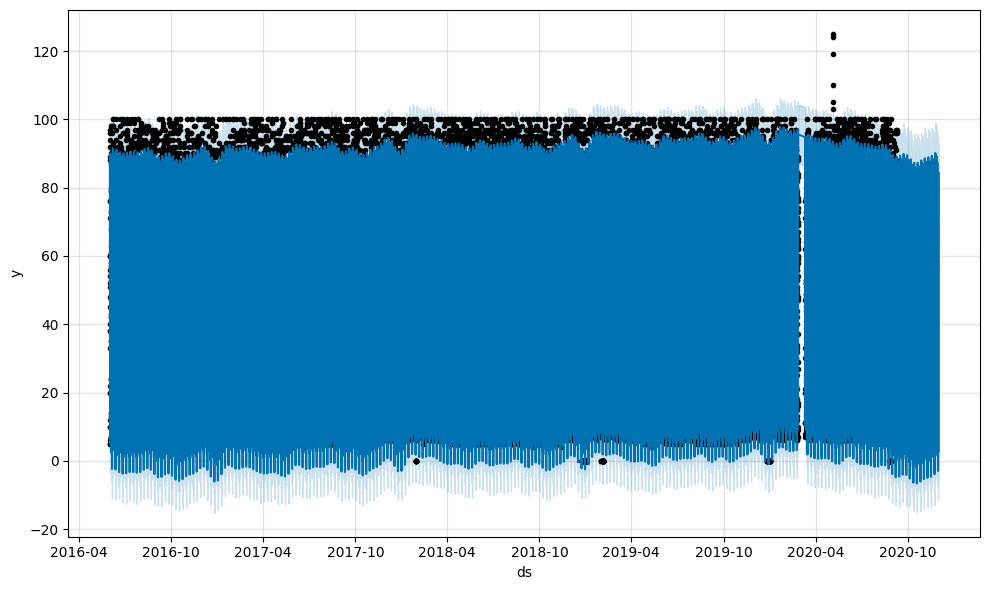

In [ ]:
# Plot the Prophet predictions for the Mercado trends data
fig = prophet_model.plot(forecast_mercado_trends)

# Show the plot
plt.show()


##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:**


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [ ]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column

# Set the index to the ds datetime column
forecast_mercado_trends.set_index('ds', inplace=True)

# View only the yhat, yhat_lower, and yhat_upper columns
forecast_subset = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]

# Display the subset DataFrame
display(forecast_subset.head())
display(forecast_subset.tail())


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,81.225338,98.290793
2016-06-01 01:00:00,86.075935,77.193620,94.737238
2016-06-01 02:00:00,75.753361,66.957476,84.002178
2016-06-01 03:00:00,60.487045,51.873773,69.002013
2016-06-01 04:00:00,43.373051,34.680819,51.704779


,yhat,yhat_lower,yhat_upper
ds,,,
2020-11-30 04:00:00,39.781638,32.145630,48.249349
2020-11-30 05:00:00,24.310504,15.714919,32.576667
2020-11-30 06:00:00,12.344836,3.628466,20.971655
2020-11-30 07:00:00,5.072692,-3.068902,14.076427
2020-11-30 08:00:00,2.877820,-5.555837,11.459875


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

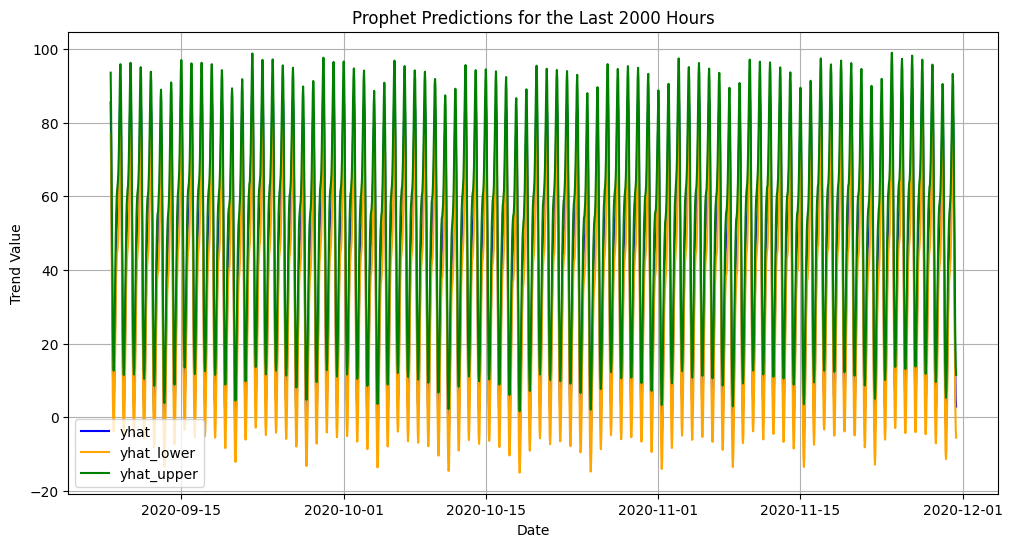

In [ ]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours



# Slice the last 2000 hours of the forecast DataFrame
forecast_last_2000 = forecast_mercado_trends.tail(2000)

# Plot the yhat, yhat_lower, and yhat_upper columns as separate lines
plt.figure(figsize=(12, 6))
plt.plot(forecast_last_2000.index, forecast_last_2000['yhat'], label='yhat', color='blue')
plt.plot(forecast_last_2000.index, forecast_last_2000['yhat_lower'], label='yhat_lower', color='orange')
plt.plot(forecast_last_2000.index, forecast_last_2000['yhat_upper'], label='yhat_upper', color='green')

# Add labels, title, legend, and grid
plt.title("Prophet Predictions for the Last 2000 Hours")
plt.xlabel("Date")
plt.ylabel("Trend Value")
plt.legend()
plt.grid()
plt.show()


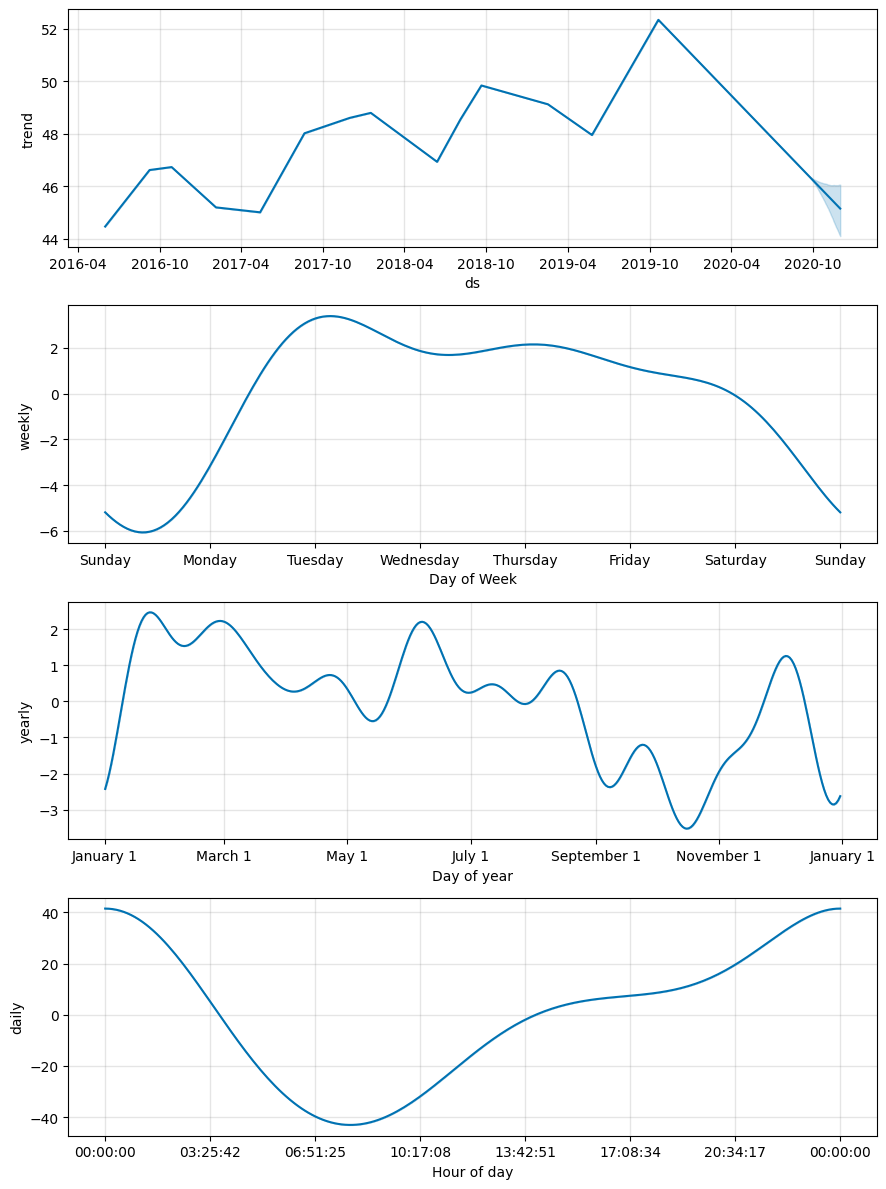

In [ ]:
# Reset the index in the forecast_mercado_trends DataFrame


# Use the plot_components function to visualize the forecast results
# for the forecast_mercado_trends DataFrame
# Reset the index in the forecast DataFrame to ensure compatibility
forecast_mercado_trends.reset_index(inplace=True)

# Use the Prophet plot_components function to visualize the forecast components
fig_components = prophet_model.plot_components(forecast_mercado_trends)

# Display the plot
plt.show()


##### Answer the following questions:

:**Question:** What time of day exhibits the greatest popularity?

**Answer:** The highest popularity is observed in the evening, closer to midnight, as the daily trend shows an upward curve reaching its peak around 11 PM to 12 AM

**Question:** Which day of week gets the most search traffic?
   
**Answer:** Tuesday appears to have the highest search traffic, as the weekly trend peaks on this day.


**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** The lowest search traffic for the calendar year occurs near the end of December, likely around Christmas or New Year's, as indicated by the yearly trend's dip in that period.
